<a href="https://colab.research.google.com/github/Shadoww002/PyTorch-Learning/blob/main/Chapter%203%20%E2%80%93%20Computer%20Vision/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
## IMPORT LIBRARIES
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [69]:
## Getting Started With FashinMINST Datasets
train_data = datasets.FashionMNIST(
    root="Data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="Data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [70]:
len(train_data) , len(test_data)

(60000, 10000)

In [71]:
train_data.data[0].shape

torch.Size([28, 28])

In [72]:
## Lets see The data

train_data[0] , train_data.test_labels[0]

/usr/local/lib/python3.11/dist-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


((tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
            0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
            0.2863, 0.0000, 0

In [73]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [74]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [75]:
image , lable = train_data[0]
image.size()

torch.Size([1, 28, 28])

In [76]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

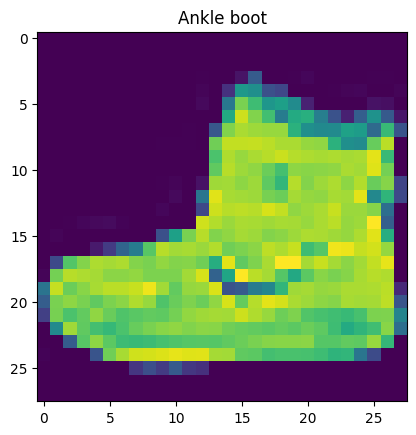

In [77]:
## Visualise The Data
plt.title(class_name[lable])
plt.imshow(image.squeeze())

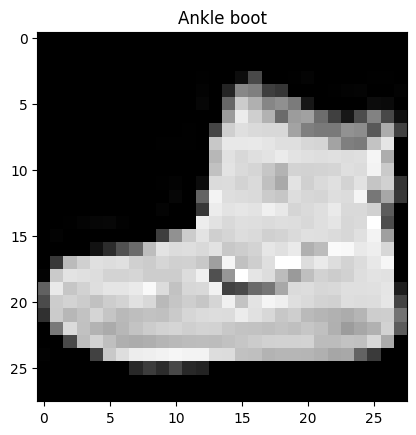

In [78]:
plt.title(class_name[lable])
plt.imshow(image.squeeze() ,
           cmap = "gray")

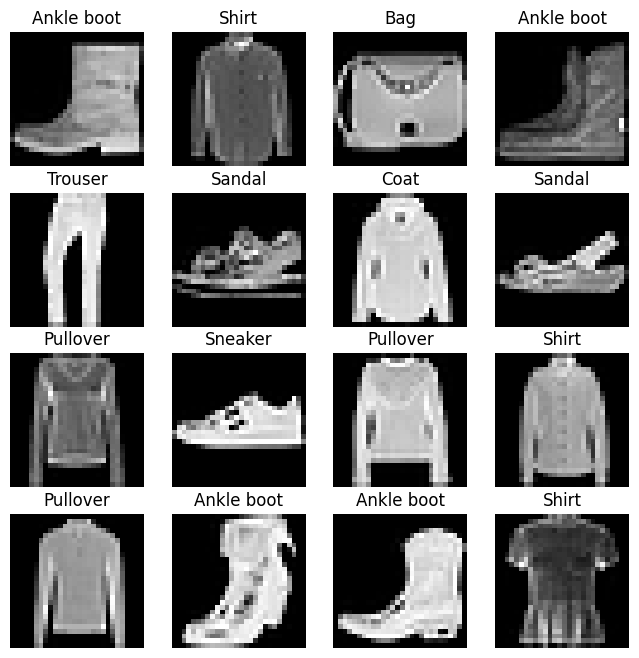

In [79]:
## Ploting The Random Images
torch.manual_seed(42)
plt.figure(figsize=(8,8))
rows , cols = 4 , 4

for i in range(1 , rows*cols+1):
  idx = torch.randint(0,len(train_data),size=[1])
  image , label = train_data[idx.squeeze()]
  class_name = train_data.classes[label]
  plt.subplot(rows , cols , i)
  plt.title(class_name)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.axis(False)


In [80]:
torch.utils

<module 'torch.utils' from '/usr/local/lib/python3.11/dist-packages/torch/utils/__init__.py'>

In [81]:
##Preparing DataLoader
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                             batch_size = 32,
                             shuffle = True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size = 32,
                             shuffle = False)

In [82]:
len(train_dataloader) , len(test_dataloader)

(1875, 313)

In [83]:
60000/32 , 10000/32

(1875.0, 312.5)

In [84]:
## Interact with the Data Loader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [85]:
class_name = train_data.classes

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

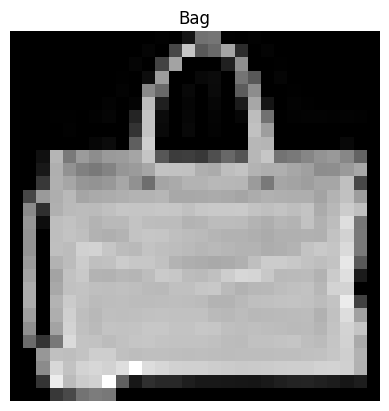

In [86]:
## Show a Sample
random_idx = torch.randint(0 , len(train_features_batch) , size=[1]).item()
img , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.title(class_name[label])
plt.imshow(img.squeeze(),cmap="gray")
plt.axis(False)

In [87]:
## Understnding the Flatten Layer Concept
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

x.shape , output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [88]:
## Creating a BaselIne Model
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,input_shape ,hidden_units, output_shape):
    super().__init__()
    self.LayerStack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features = output_shape)
    )

  def forward(self , x):
    return self.LayerStack(x)

In [89]:
28*28

784

In [90]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_name)
).to("cpu")

model_0

FashionMNISTModelV0(
  (LayerStack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [91]:
##Import HELPER Functions

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [92]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [93]:
## Creating a Function To Time Experiments
from timeit import default_timer as timer

def print_train_time (
    start : float ,
    end : float,
    device : torch.device = None):

  total_time = end - start
  print(f"Train Time : {total_time:.3f} on {device}")

  return total_time

In [98]:
## Building a Train and Test loop

# import tqdm
from tqdm.auto import tqdm

#setting seed and start time
torch.manual_seed(42)
train_start_time_cpu = timer()

# Set epochs
epochs = 3

##creating a loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n------")
  ##Train Loop
  train_loss = 0
  for batch , (X,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred , y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0 :
      print(f"Looked At : {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss = train_loss/len(train_dataloader)

  ##Testing LOOP

  test_loss , test_acc = 0 ,0
  model_0.eval()
  with torch.inference_mode():
    for X , y in test_dataloader:

      test_pred = model_0(X)

      test_loss = test_loss + loss_fn(test_pred , y)

      test_acc += accuracy_fn(y_true=y , y_pred= test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  print(f"\nTrain Loss : {train_loss:.5f} | test Loss : {test_loss:.5f} | Test Acc : {test_acc:.2f}%\n")

train_end_time_cpu = timer()
total_train_time_cpu = print_train_time(start=train_start_time_cpu,
                                        end=train_end_time_cpu,
                                        device = str(next(model_0.parameters()).device))






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
------
Looked At : 0/60000 samples
Looked At : 12800/60000 samples
Looked At : 25600/60000 samples
Looked At : 38400/60000 samples
Looked At : 51200/60000 samples

Train Loss : 0.42288 | test Loss : 0.45565 | Test Acc : 84.05%

Epoch : 1
------
Looked At : 0/60000 samples
Looked At : 12800/60000 samples
Looked At : 25600/60000 samples
Looked At : 38400/60000 samples
Looked At : 51200/60000 samples

Train Loss : 0.42063 | test Loss : 0.45865 | Test Acc : 84.26%

Epoch : 2
------
Looked At : 0/60000 samples
Looked At : 12800/60000 samples
Looked At : 25600/60000 samples
Looked At : 38400/60000 samples
Looked At : 51200/60000 samples

Train Loss : 0.41727 | test Loss : 0.46192 | Test Acc : 84.02%

Train Time : 33.512 on cpu
